# IV - dIdV Sweep Analysis Demo


The analysis of IV/dIdV sweep data is done in 2 steps:
1. <font color="blue"><b>Processing of the data</b> </font> which includes cutting pile-ups using "autocut", calculating offset, noise PSD (if IV/noise data available). 
  * Users can choose to process specific channels and to enable processing of IV/noise and/or dIdV data. 
  * By default, all available data for all channels are processed. 
  * Best is to process using <b>detprocess/scripts/process.py </b> rather than processing in a Jupyter notebook (see processing section). <br><br>
  
2. <font color="blue"><b>IV and/or dIdV analysis</b></font>: Analyze IV data to calculate TES resistance and bias power, fit dIdV if dIdV data available. This is done in a Jupyter notebook.  Multiple channels can be analyzed in the same time. 



We use data taken at UC Berkeley  using Spice/Herald <b>Melange 4% </b> and <b>Melange 1% </b> devices. Data are only stored locally. Change path to run notebook

In [2]:
import qetpy as qp
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import DIDVAnalysis, IVSweepAnalysis, IVSweepProcessing

## 1. IV Sweep processing


This step can be either done in a Jupyter Notebook or command line:

 * <font color="blue"><b>Jupyter Notebook:</b></font>
   * Instantiate IVSweepProcessing with data path
   * Call process" function. Default: all channels available processed, both IV and dIdV if available. Use arguments to disable either IV or dIdV or select specific channels. 
   
 * <font color="blue"><b>Command line </b></font> using <i><b>scripts/process.py</b></i> (<font color="red"><b>preferred</b></font>)
   * example: <i> python3 scripts/process.py --enable-ivsweep --raw_path /sdata1/runs/run28/raw/iv_didv_I2_D20230615_T231959 --ncores 16</i>

#### Processing using Jupyter Notebook directly

Let's save data in default location (same base directory as raw data + /processed/[group_name]/sweep_analysis_DYYYYMMDD_HHMMSS.hdf5). <br>
A different base path can be provided using "save_path" argument

In [3]:
base_path = '/sdata1/runs/run28'

#### Melange 4% processing
(in the notebook for demo but best is to launch processing using process.py script)

In [4]:
# Melange 4%
melange4pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230621_T131907'
myproc = IVSweepProcessing(melange4pc_ivsweep_path)

dataframe_4pc = myproc.process(ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange4pc1ch:
 -IV: 27 bias points
 -dIdV: 27 bias points
 -Common IV-dIdV: 27 bias points


#### Melange 1% processing
(in the notebook for demo but best is to launch processing using process.py script)

In [5]:
# Melange 1%
melange1pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230615_T231959'
myproc = IVSweepProcessing(melange1pc_ivsweep_path)

dataframe_1pc = myproc.process(ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange1pc1ch:
 -IV: 28 bias points
 -dIdV: 28 bias points
 -Common IV-dIdV: 28 bias points


## 2. IV/dIdV Sweep Analysis

For the moment, the analysis needs to be done in a Jupyter Notebook. There are several steps:

Instantiate <b>IVSweepAnalysis</b>, then
1. <font color='red'><b>Set proceesed data:</b></font>
  * using file name (<i>set_data_from_file()</i> function), can be called mutliple times if multiple channels
  * or using dataframe directly (<i>set_data_from_dataframe()</i> function), can be called mutliple times if multiple channels
  * or using a dictionary with keys=channels and values=dataframes (<i>set_data_from_dataframe()</i> function)<br><br>
  
2. <font color='red'><b>Check data</b></font> Before analyzing the IV sweep data, it is best to have a look
  * Use <i>describe()</i> function to check what is available (channels, IV and/or dIdV points)
  * Plot raw offset in function of bias using "<i>plot_ivsweep_offset(channel)</i> function
  * During the proc
 
  
3. <font color='red'><b>Analyze IV sweep  to calculate I0, R0, P0 </b></font> (from IV and/or dIdV data) using "<i>analyze_sweep()"</i> function. <br><br>
    
4. <font color='red'><b>Analysze dIdV data</b></font>: Fit dIdV, calculate small signal parameters and uncertainties
   *  <b>Plot dIdV summary for a specific channel:</b> Make summary plots such as chi2, Loop gain, etc. using "<i>plot_didv_summary()</i>" function <br><br>
   
   
5. <font color='red'><b>Calculate energy resolution for each bias points</b></font> using <i>calc_energy_resolution()</i> function
   * Template is automatically calculate from small signal paramaters
   * Additionally, a template can be provided
   
   
6. <font color='red'><b>Noise Analysis/Simulation</b></font>: To be implemented
   

  

### Instantiate IV Analysis and set data (for multiple channels)

In [6]:
# instantiate Analysis
# let's automatically save analysis results in am hdf5 file
# a path (default: /path/to/run#/filterdata) or existing file can be provided
ivanalysis = IVSweepAnalysis(verbose=True, auto_save_hdf5=True)

# Melange 1%
melange1pc_data = base_path + '/processed/iv_didv_I2_D20230615_T231959/sweep_processing_D20240109_T165434.hdf5'
ivanalysis.set_data_from_file(melange1pc_data)

# Melange 4%
melange4pc_data = base_path + '/processed/iv_didv_I2_D20230621_T131907/sweep_processing_D20240109_T184445.hdf5'
ivanalysis.set_data_from_file(melange4pc_data)


INFO: Results will be automatically saved in ivsweep_analysis_D20240130_T135424.hdf5
INFO: Loading filter data from file /sdata1/runs/run28/processed/iv_didv_I2_D20230615_T231959/sweep_processing_D20240109_T165434.hdf5
INFO: Loading filter data from file /sdata1/runs/run28/processed/iv_didv_I2_D20230621_T131907/sweep_processing_D20240109_T184445.hdf5


### Check data


Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (28, 41)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (27, 41)
       Nb SC points: 5
       Nb Normal points: 9


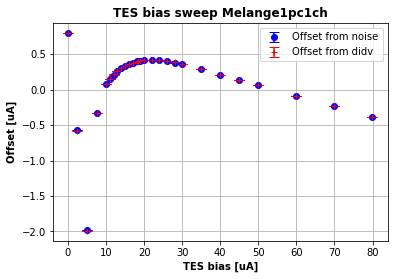

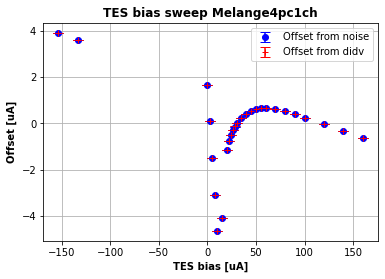

In [7]:
ivanalysis.describe()

# plot raw offset (no analysis)
ivanalysis.plot_ivsweep_offset(channel='Melange1pc1ch')
ivanalysis.plot_ivsweep_offset(channel='Melange4pc1ch')

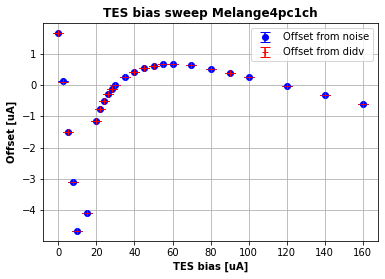


Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (28, 41)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (25, 42)
       Nb SC points: 5
       Nb Normal points: 7


In [8]:
# The first two bias points for Melange 45 (with negative TES bias) were not properly set
# let's remove then

# let's get dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange4pc1ch')


# cut the negative tes bias
cut = ivdata.tes_bias_uA>0
ivdata = ivdata[cut].reset_index()

# set data again
ivanalysis.set_data_from_dataframe('Melange4pc1ch', ivdata)

# check data
ivanalysis.plot_ivsweep_offset(channel='Melange4pc1ch')

ivanalysis.describe()

In [9]:
# we also need to modify the number of normal bias points for Melange 4%
ivanalysis.set_nb_sc_normal_points('Melange4pc1ch', nnorm=5)
ivanalysis.describe()


Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (28, 41)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (25, 42)
       Nb SC points: 5
       Nb Normal points: 5


### Analyze sweep

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5


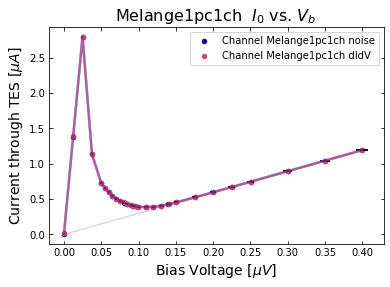

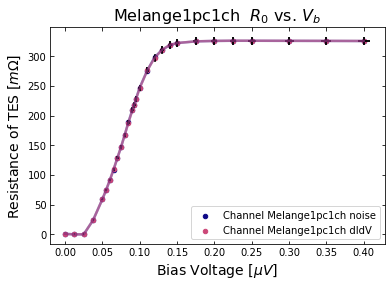

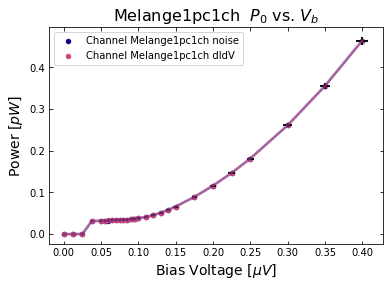

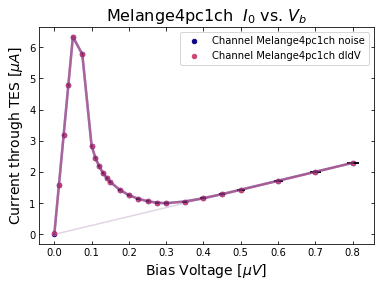

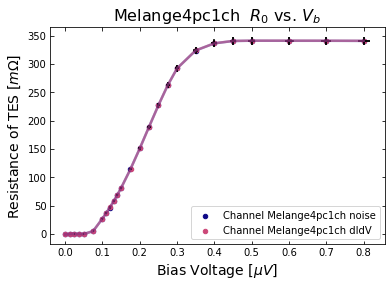

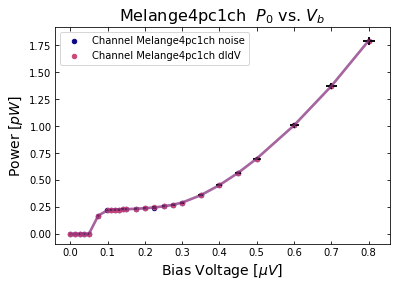

In [10]:
ivanalysis.analyze_sweep(lgc_plot=True, lgc_invert_offset='auto')

### Get IV sweep analysis results

In [11]:
result = ivanalysis.get_ivsweep_results('Melange1pc1ch')
result

{'rp': 0.003919024994864679,
 'rp_err': 7.838049989729357e-05,
 'rn': 0.32621300819553267,
 'rn_err': 0.006703098935646631,
 'rshunt': 0.004999999888241291,
 'rshunt_err': 9.999999776482583e-05,
 'i0_off': -8.089905050552639e-07,
 'i0_off_err': 1.9736996071356912e-11,
 'ibias_off': 1.4305333723784196e-08,
 'ibias_off_err': 3.9430034832447756e-11,
 'lgc_invert_offset': True,
 'close_loop_norm': 625000.0,
 'output_variable_offset': -0.07203907519578934,
 'output_variable_gain': 50.0,
 'group_name_sweep': 'iv_didv_I2_D20230615_T231959',
 'i0_variable_offset': -5.763126015663147e-06}

### Analyze didV data 


Melange1pc1ch SC dIdV analysis


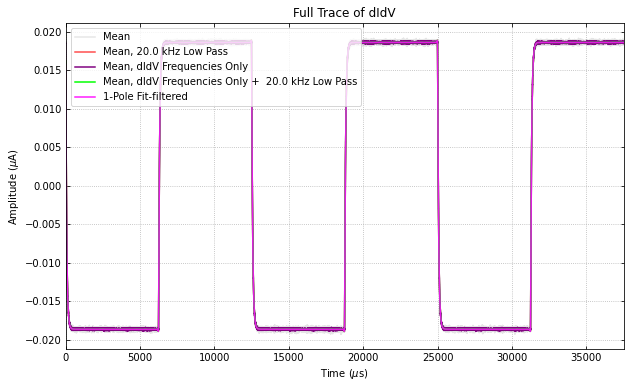

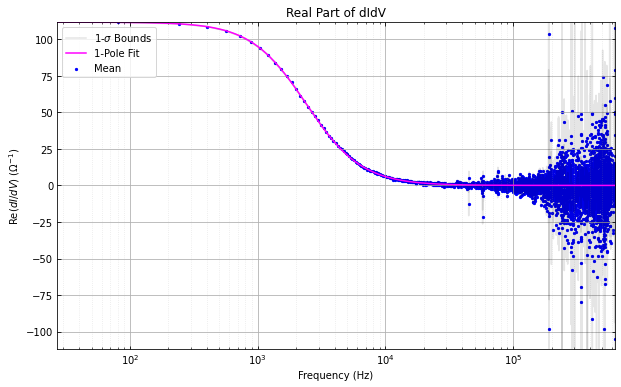

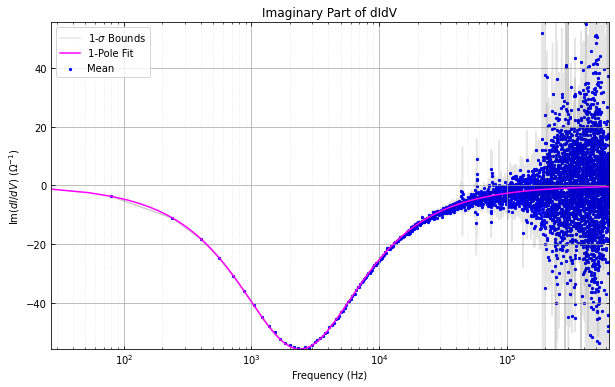

Melange1pc1ch Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Melange1pc1ch Rp from IV Sweep = 3.92 +/- 0.078 mOhms

Melange4pc1ch SC dIdV analysis


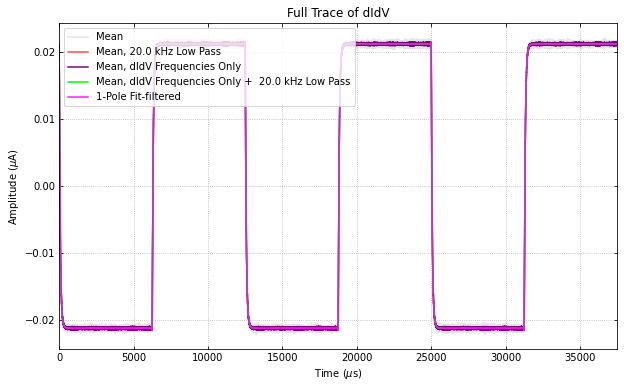

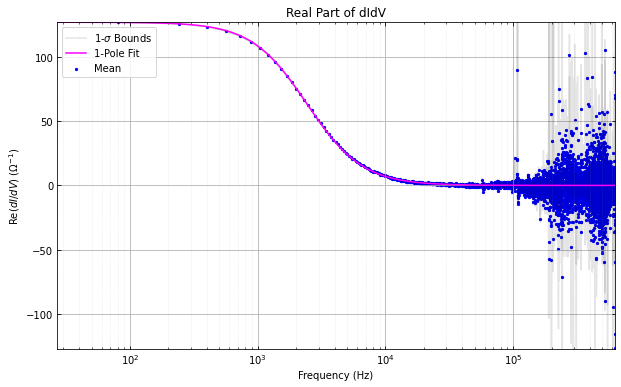

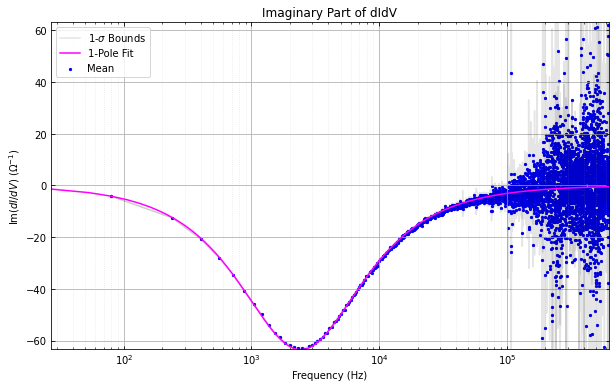

Melange4pc1ch Rp from dIdV fit = 2.88 +/- 0.007 mOhms
Melange4pc1ch Rp from IV Sweep = 2.87 +/- 0.057 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hd

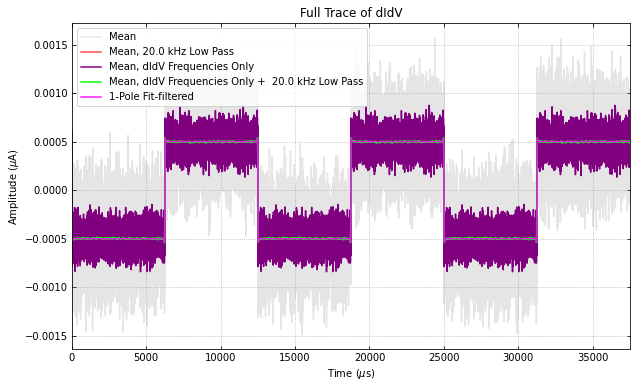

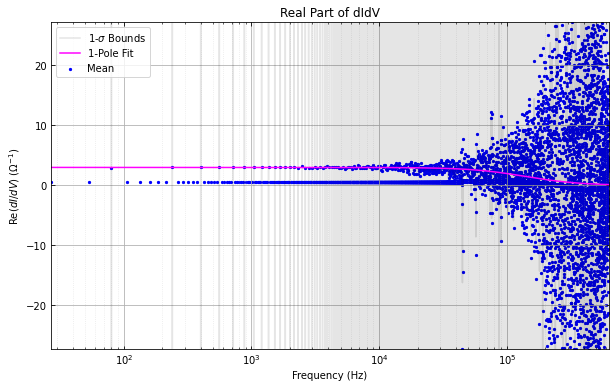

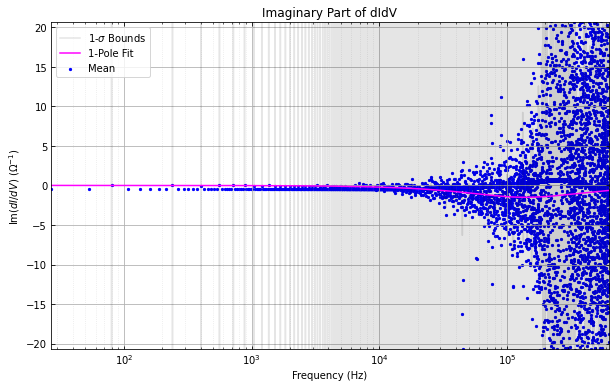

Melange1pc1ch Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Melange1pc1ch Rn from IV Sweep = 326.21 +/- 6.703 mOhms

Melange4pc1ch Normal dIdV analysis


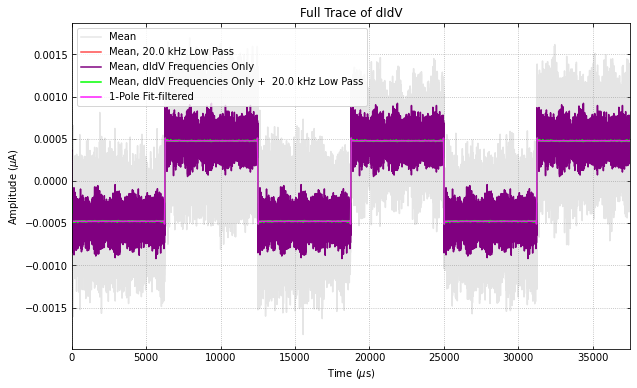

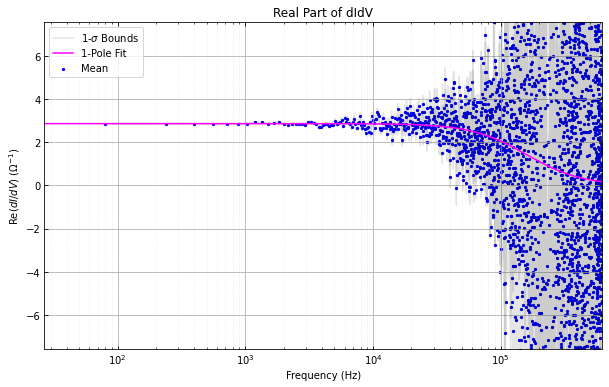

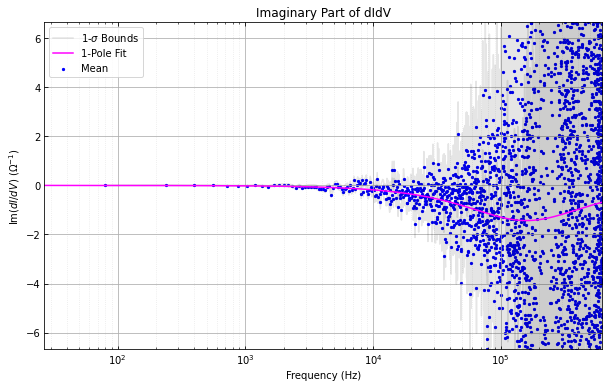

Melange4pc1ch Rn from dIdV fit = 340.25 +/- 1.400 mOhms
Melange4pc1ch Rn from IV Sweep = 340.86 +/- 6.975 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T13542

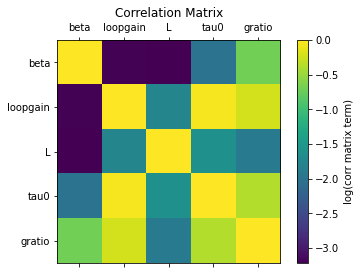

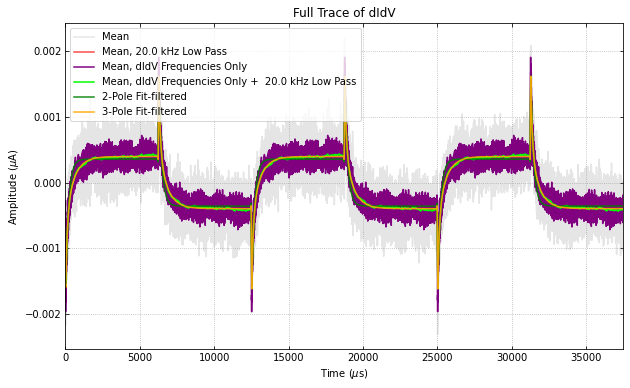

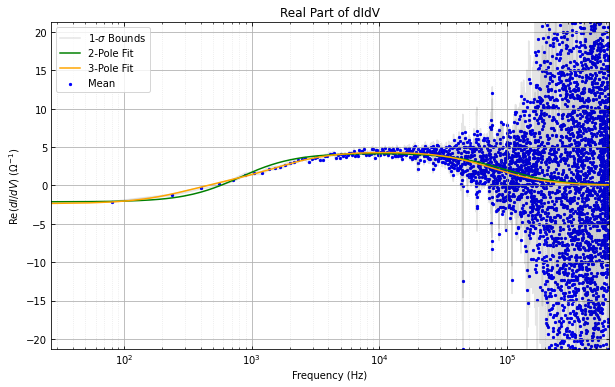

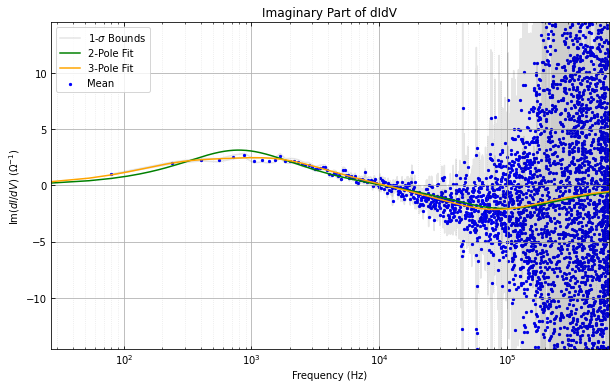



Melange1pc1ch TES bias 18.025 uA, R0 = 210.21 mOhms (% Rn = 64.40)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000734 s
Tau2: 2.22e-06 s
Tau3: 0.0003151 s
 

True dIdV Poles: 
Tau_plus: 2.28e-06 s
Tau_minus: 8.92e-05 s
Tau_third: 0.0004932 s

Small Signal Parameters:
l (loop gain) = 1.302 +/- 0.0523
beta = 0.017 +/- 0.0214
gratio = 0.628 +/- 0.0165
tau0 = 0.222 +/- 0.01157 ms
L = 493.785 +/- 15.1254 nH


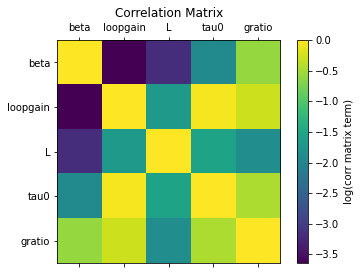

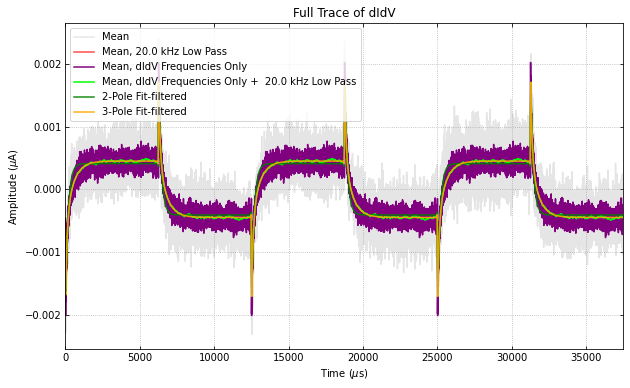

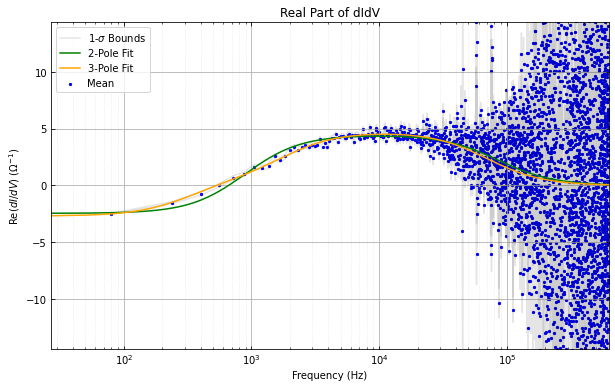

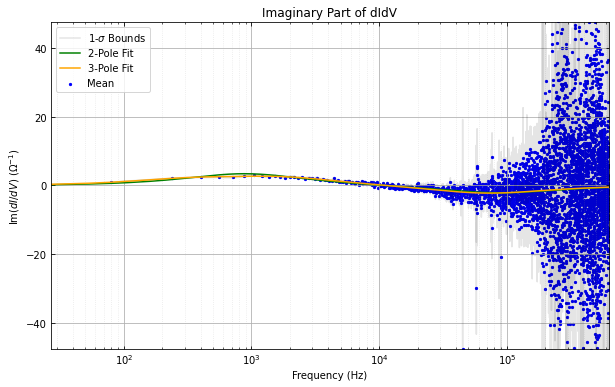



Melange1pc1ch TES bias 16.967 uA, R0 = 189.09 mOhms (% Rn = 58.00)

Fit chi2/Ndof = 0.166

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00033 s
Tau2: 2.32e-06 s
Tau3: 0.0004094 s
 

True dIdV Poles: 
Tau_plus: 2.39e-06 s
Tau_minus: 0.000104 s
Tau_third: 0.0005694 s

Small Signal Parameters:
l (loop gain) = 1.932 +/- 0.0899
beta = 0.048 +/- 0.0222
gratio = 0.606 +/- 0.0208
tau0 = 0.307 +/- 0.01772 ms
L = 480.946 +/- 14.7999 nH


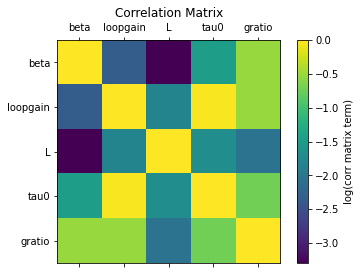

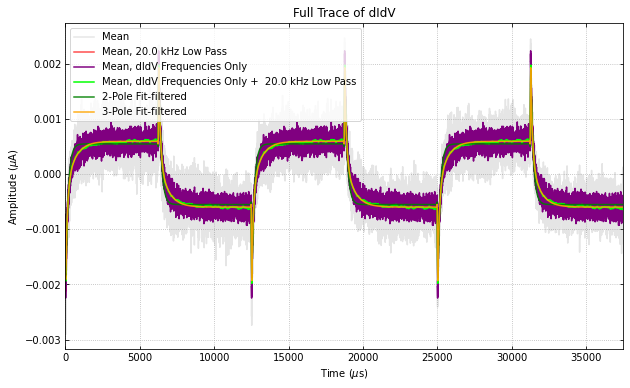

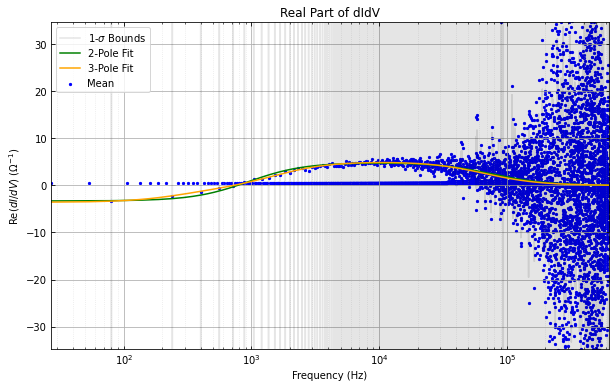

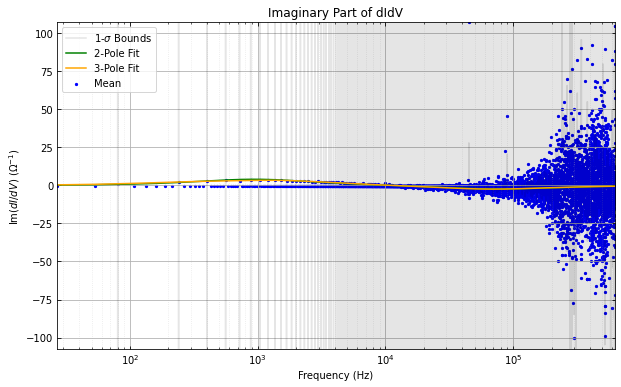



Melange1pc1ch TES bias 15.990 uA, R0 = 167.93 mOhms (% Rn = 51.50)

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000315 s
Tau2: 2.69e-06 s
Tau3: 0.0002724 s
 

True dIdV Poles: 
Tau_plus: 2.79e-06 s
Tau_minus: 9.05e-05 s
Tau_third: 0.0004175 s

Small Signal Parameters:
l (loop gain) = 1.875 +/- 0.0915
beta = 0.058 +/- 0.0222
gratio = 0.681 +/- 0.0196
tau0 = 0.275 +/- 0.01647 ms
L = 501.687 +/- 11.2887 nH


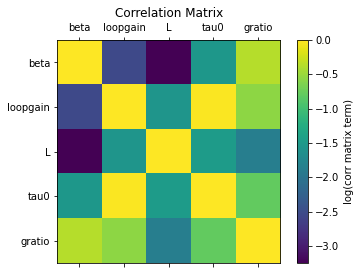

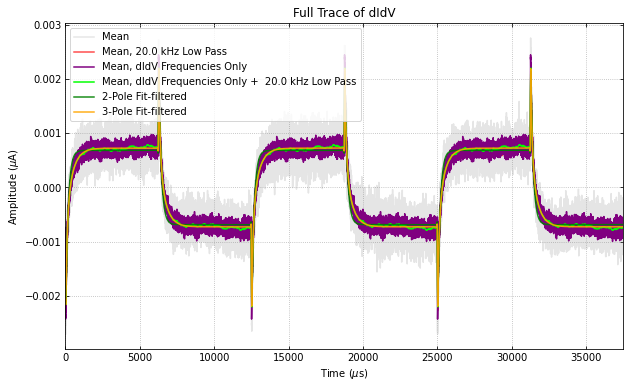

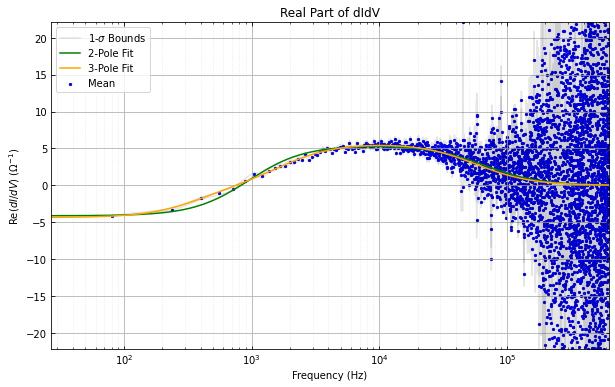

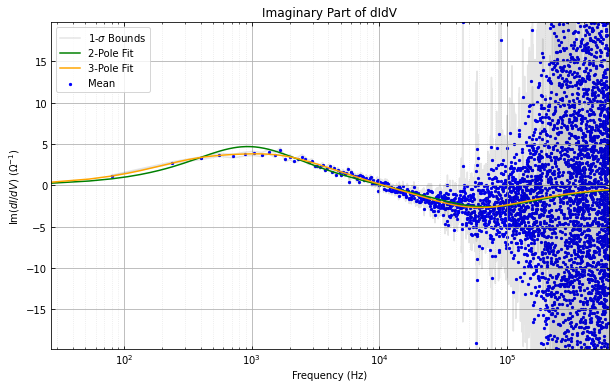



Melange1pc1ch TES bias 15.013 uA, R0 = 147.56 mOhms (% Rn = 45.20)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000281 s
Tau2: 2.98e-06 s
Tau3: 0.0002006 s
 

True dIdV Poles: 
Tau_plus: 3.12e-06 s
Tau_minus: 7.84e-05 s
Tau_third: 0.0003391 s

Small Signal Parameters:
l (loop gain) = 1.875 +/- 0.1208
beta = 0.097 +/- 0.0234
gratio = 0.746 +/- 0.0210
tau0 = 0.246 +/- 0.01901 ms
L = 509.893 +/- 11.7660 nH


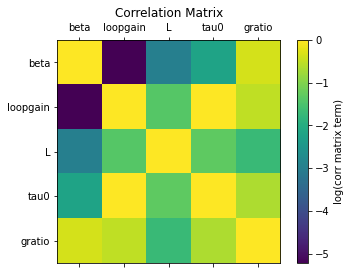

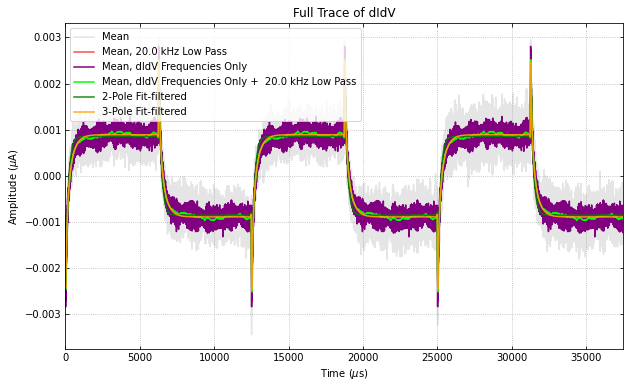

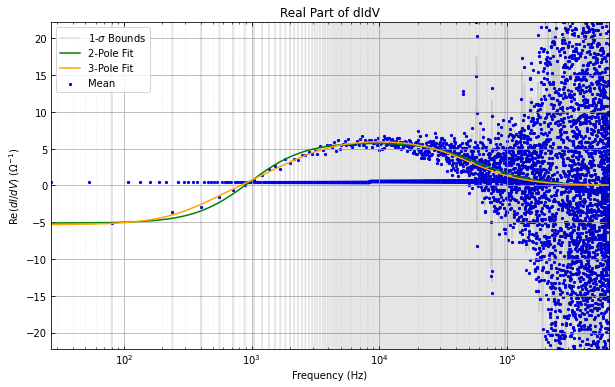

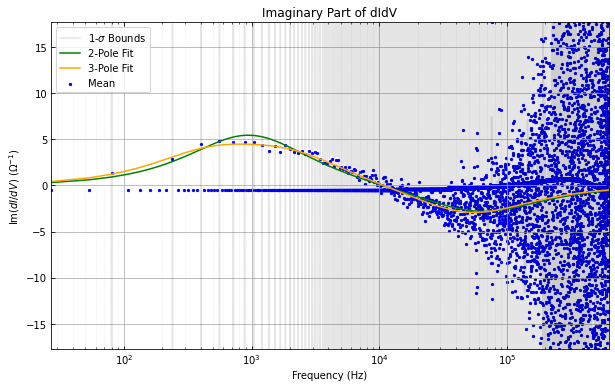



Melange1pc1ch TES bias 14.036 uA, R0 = 129.13 mOhms (% Rn = 39.60)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000242 s
Tau2: 3.36e-06 s
Tau3: 0.000191 s
 

True dIdV Poles: 
Tau_plus: 3.54e-06 s
Tau_minus: 7.81e-05 s
Tau_third: 0.0003229 s

Small Signal Parameters:
l (loop gain) = 2.076 +/- 0.1297
beta = 0.111 +/- 0.0236
gratio = 0.764 +/- 0.0211
tau0 = 0.26 +/- 0.01935 ms
L = 512.737 +/- 9.3617 nH


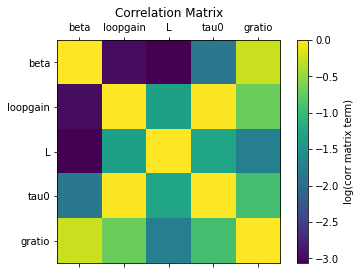

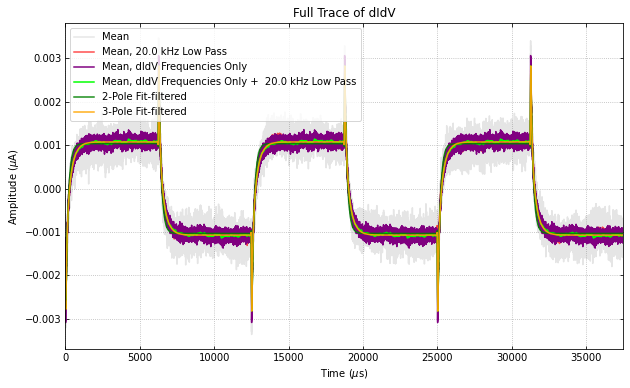

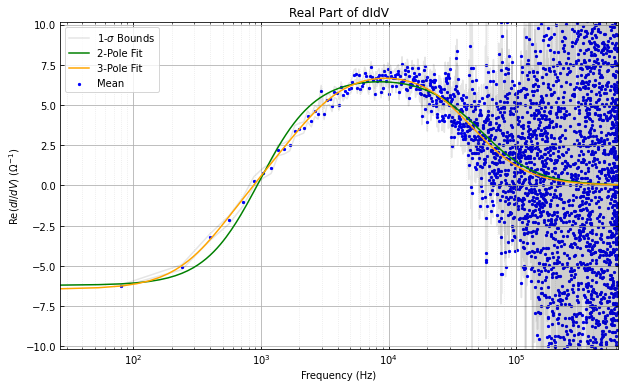

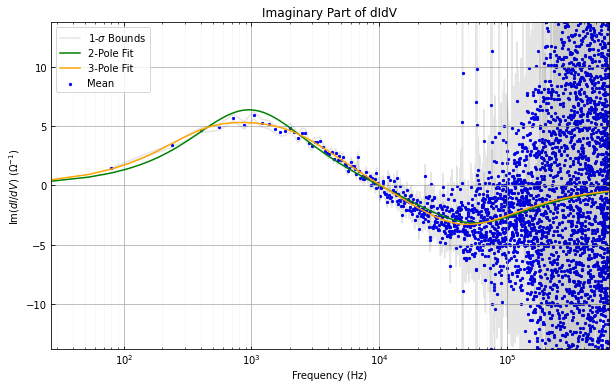



Melange1pc1ch TES bias 12.978 uA, R0 = 108.89 mOhms (% Rn = 33.40)

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000183 s
Tau2: 4.19e-06 s
Tau3: 0.0002669 s
 

True dIdV Poles: 
Tau_plus: 4.49e-06 s
Tau_minus: 8.76e-05 s
Tau_third: 0.000399 s

Small Signal Parameters:
l (loop gain) = 2.760 +/- 0.1776
beta = 0.147 +/- 0.0248
gratio = 0.764 +/- 0.0252
tau0 = 0.322 +/- 0.02435 ms
L = 561.421 +/- 10.2254 nH


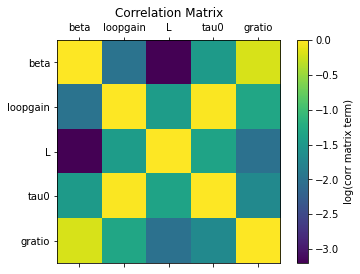

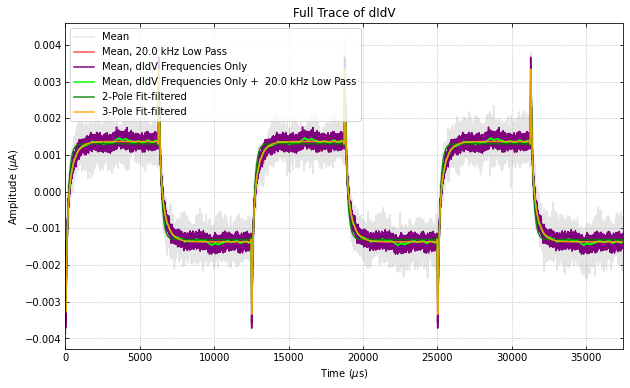

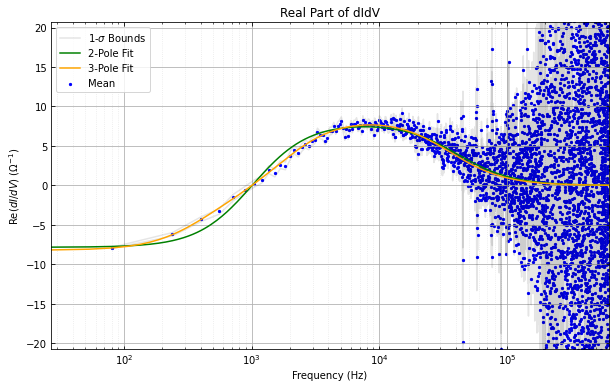

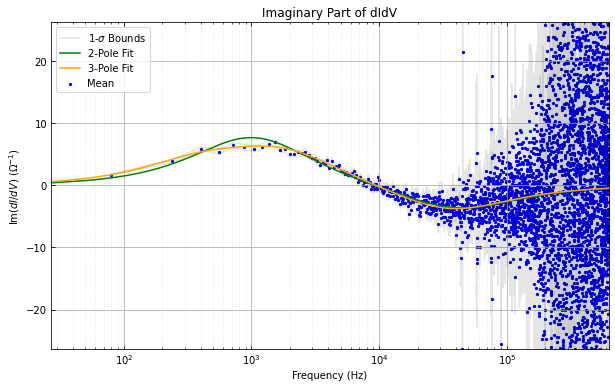



Melange1pc1ch TES bias 12.001 uA, R0 = 91.58 mOhms (% Rn = 28.10)

Fit chi2/Ndof = 0.162

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00017 s
Tau2: 4.4e-06 s
Tau3: 0.0002015 s
 

True dIdV Poles: 
Tau_plus: 4.75e-06 s
Tau_minus: 7.74e-05 s
Tau_third: 0.0003349 s

Small Signal Parameters:
l (loop gain) = 2.643 +/- 0.1720
beta = 0.207 +/- 0.0261
gratio = 0.819 +/- 0.0235
tau0 = 0.279 +/- 0.02137 ms
L = 525.256 +/- 8.0588 nH


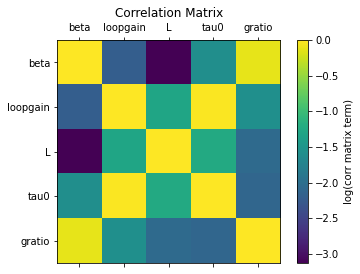

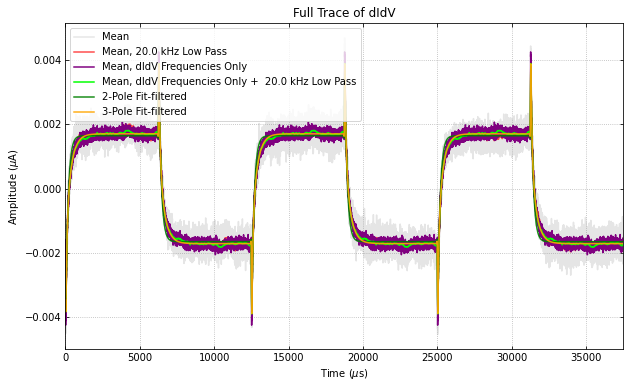

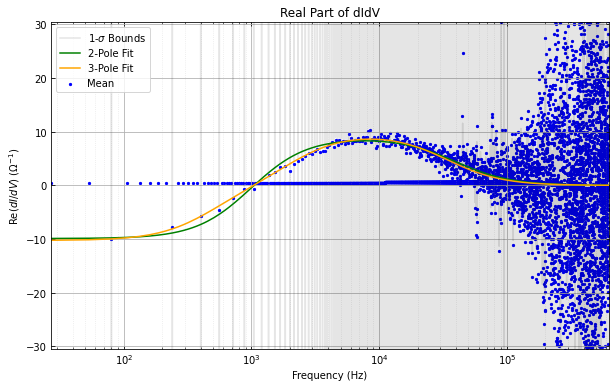

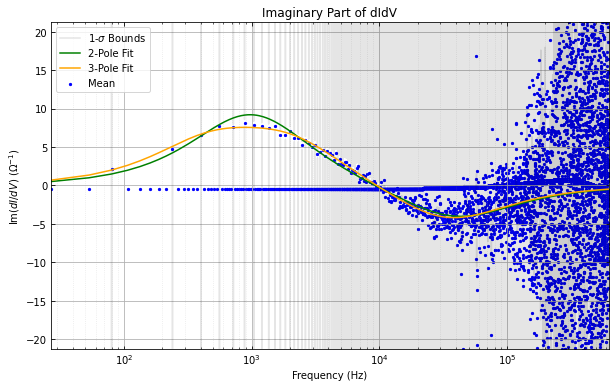



Melange1pc1ch TES bias 11.025 uA, R0 = 75.18 mOhms (% Rn = 23.00)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000135 s
Tau2: 5.07e-06 s
Tau3: 0.0001999 s
 

True dIdV Poles: 
Tau_plus: 5.6e-06 s
Tau_minus: 7.76e-05 s
Tau_third: 0.0003177 s

Small Signal Parameters:
l (loop gain) = 3.248 +/- 0.2113
beta = 0.286 +/- 0.0280
gratio = 0.803 +/- 0.0270
tau0 = 0.304 +/- 0.02302 ms
L = 535.569 +/- 6.9604 nH


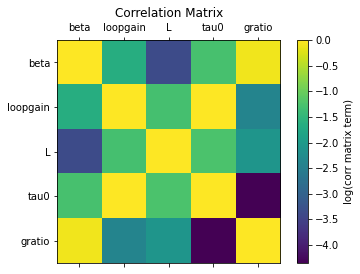

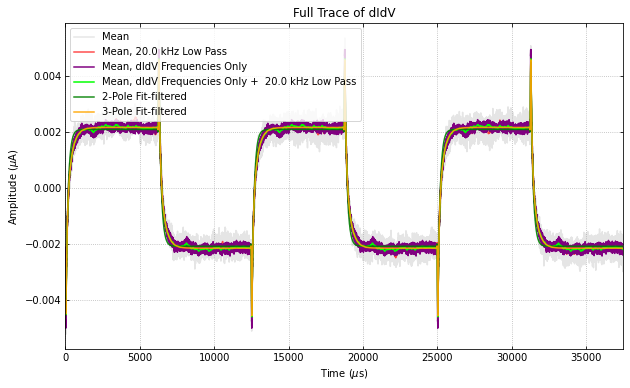

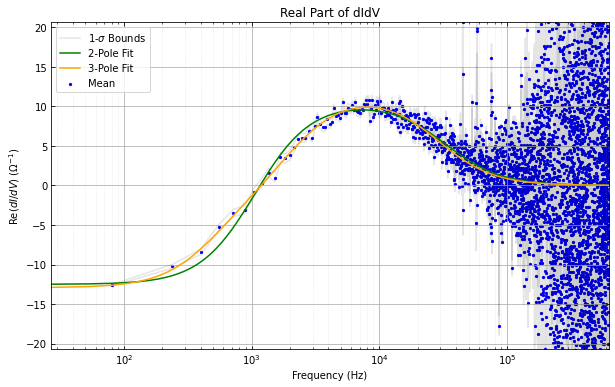

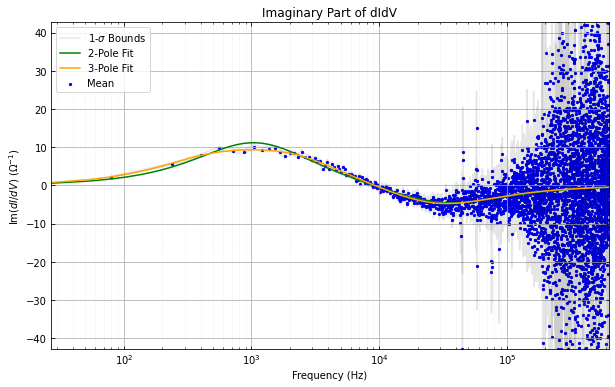



Melange1pc1ch TES bias 9.966 uA, R0 = 58.86 mOhms (% Rn = 18.00)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000113 s
Tau2: 6.3e-06 s
Tau3: 0.0002444 s
 

True dIdV Poles: 
Tau_plus: 7.19e-06 s
Tau_minus: 8.26e-05 s
Tau_third: 0.0003658 s

Small Signal Parameters:
l (loop gain) = 4.134 +/- 0.2558
beta = 0.360 +/- 0.0301
gratio = 0.819 +/- 0.0324
tau0 = 0.353 +/- 0.0253 ms
L = 560.507 +/- 6.0907 nH


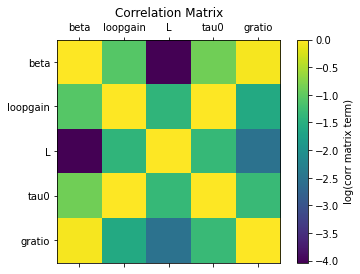

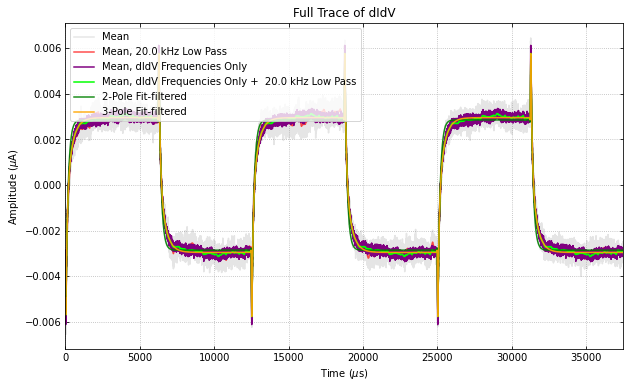

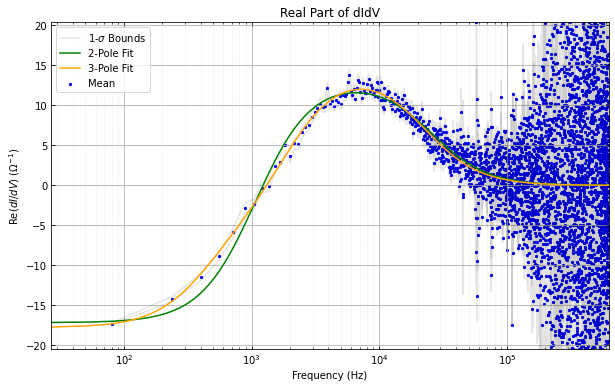

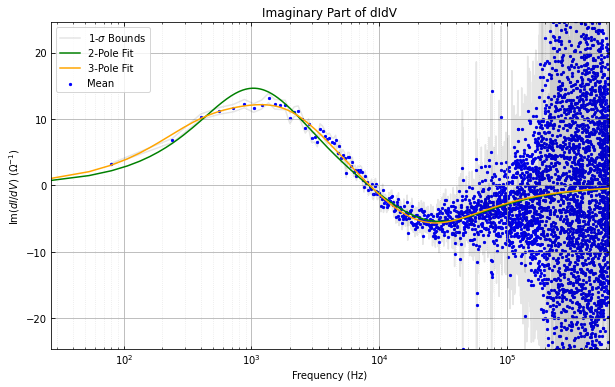



Melange1pc1ch TES bias 7.524 uA, R0 = 24.12 mOhms (% Rn = 7.40)

Fit chi2/Ndof = 0.167

Fit time constants, NOT dIdV Poles: 
Tau1: 6.4e-05 s
Tau2: 1.08e-05 s
Tau3: 0.000228 s
 

True dIdV Poles: 
Tau_plus: 1.49e-05 s
Tau_minus: 8.94e-05 s
Tau_third: 0.0003377 s

Small Signal Parameters:
l (loop gain) = 9.129 +/- 0.8674
beta = 0.789 +/- 0.0439
gratio = 0.817 +/- 0.0640
tau0 = 0.52 +/- 0.05413 ms
L = 562.801 +/- 4.4602 nH


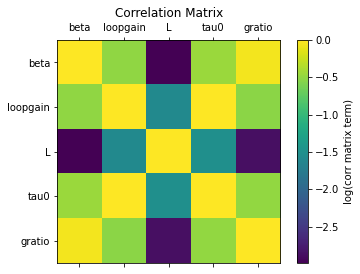

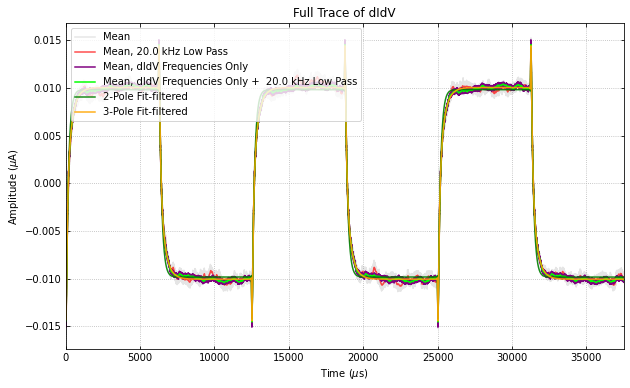

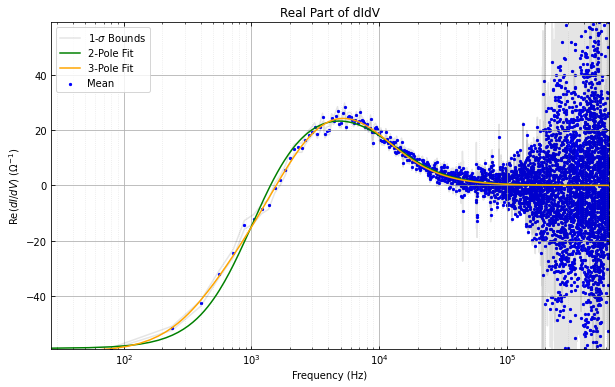

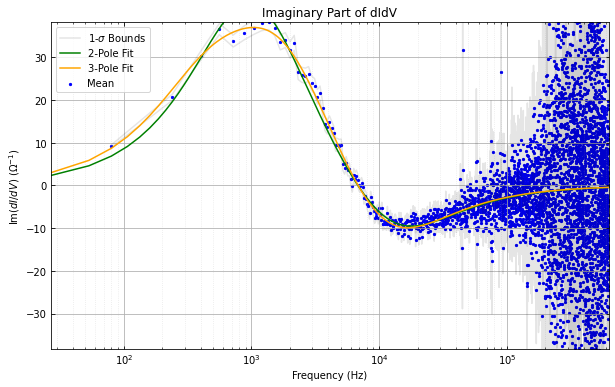


Melange4pc1ch Transition dIdV analysis


Melange4pc1ch TES bias 50.015 uA, R0 = 227.27 mOhms (% Rn = 66.70)

Fit chi2/Ndof = 0.176

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00028 s
Tau2: 1.48e-06 s
Tau3: 0.0002034 s
 

True dIdV Poles: 
Tau_plus: 1.53e-06 s
Tau_minus: 5.81e-05 s
Tau_third: 0.0002921 s

Small Signal Parameters:
l (loop gain) = 1.531 +/- 0.0408
beta = 0.125 +/- 0.0237
gratio = 0.540 +/- 0.0140
tau0 = 0.149 +/- 0.00553 ms
L = 391.449 +/- 17.1541 nH


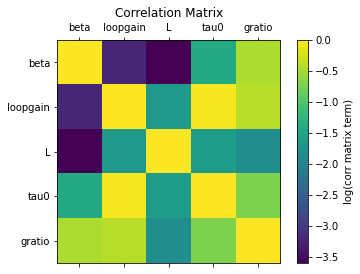

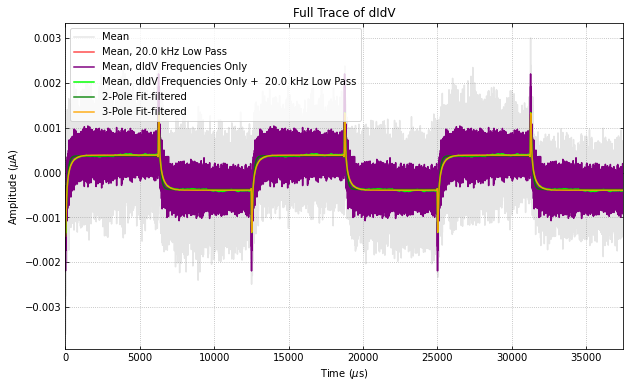

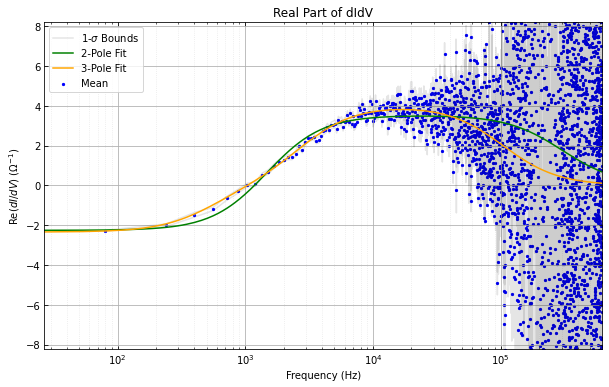

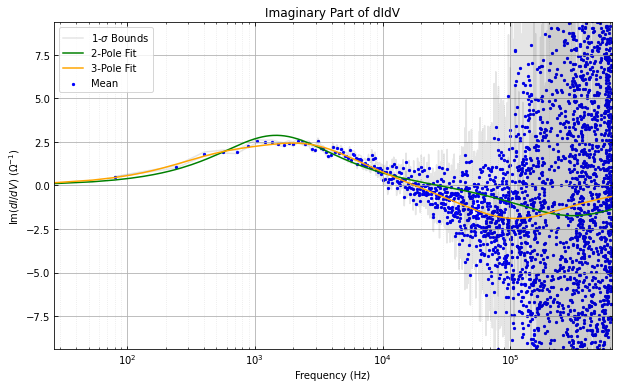



Melange4pc1ch TES bias 44.968 uA, R0 = 189.13 mOhms (% Rn = 55.50)

Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000129 s
Tau2: 1.55e-06 s
Tau3: 0.0003278 s
 

True dIdV Poles: 
Tau_plus: 1.6e-06 s
Tau_minus: 6.43e-05 s
Tau_third: 0.0004192 s

Small Signal Parameters:
l (loop gain) = 2.614 +/- 0.0773
beta = 0.214 +/- 0.0257
gratio = 0.548 +/- 0.0171
tau0 = 0.209 +/- 0.008025 ms
L = 367.650 +/- 15.3248 nH


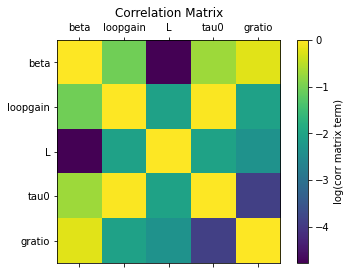

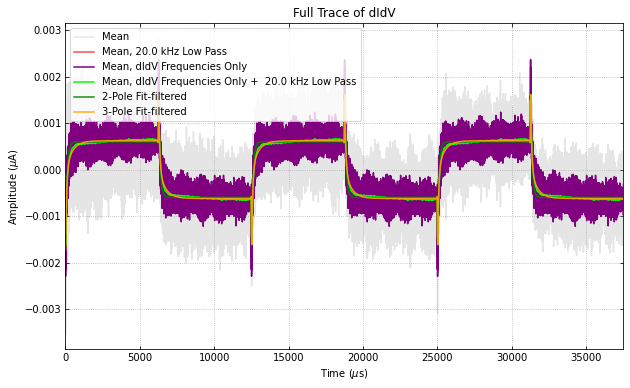

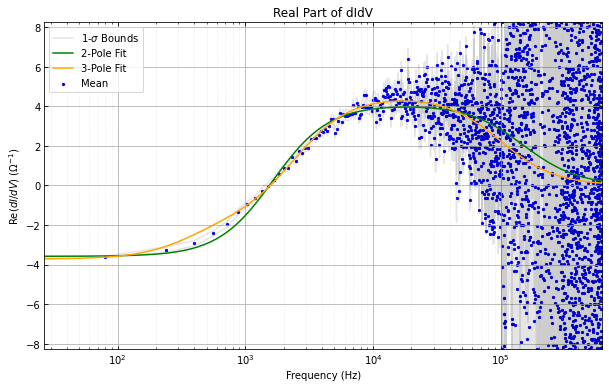

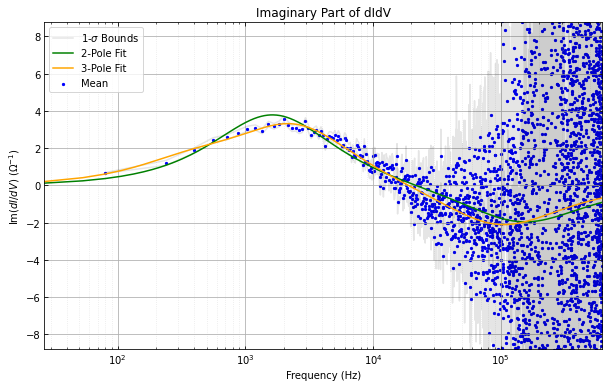



Melange4pc1ch TES bias 40.003 uA, R0 = 150.94 mOhms (% Rn = 44.30)

Fit chi2/Ndof = 0.175

Fit time constants, NOT dIdV Poles: 
Tau1: 9.81e-05 s
Tau2: 2.22e-06 s
Tau3: 0.0002157 s
 

True dIdV Poles: 
Tau_plus: 2.36e-06 s
Tau_minus: 5.75e-05 s
Tau_third: 0.0002923 s

Small Signal Parameters:
l (loop gain) = 3.201 +/- 0.1210
beta = 0.274 +/- 0.0270
gratio = 0.680 +/- 0.0220
tau0 = 0.216 +/- 0.01012 ms
L = 444.656 +/- 12.4655 nH


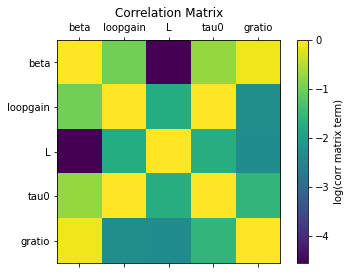

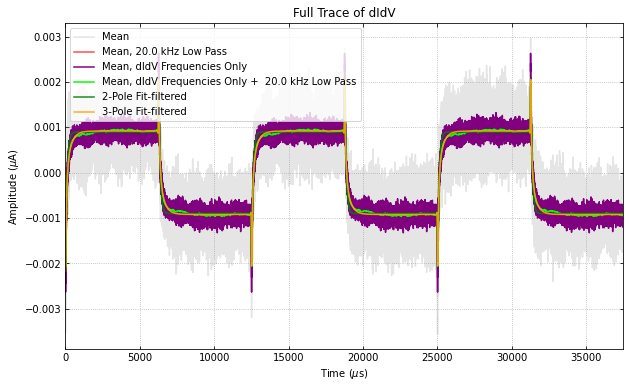

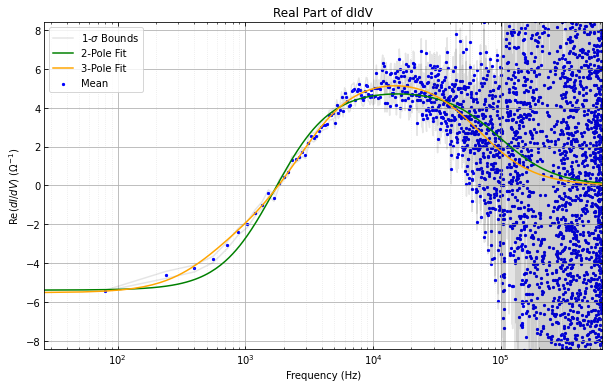

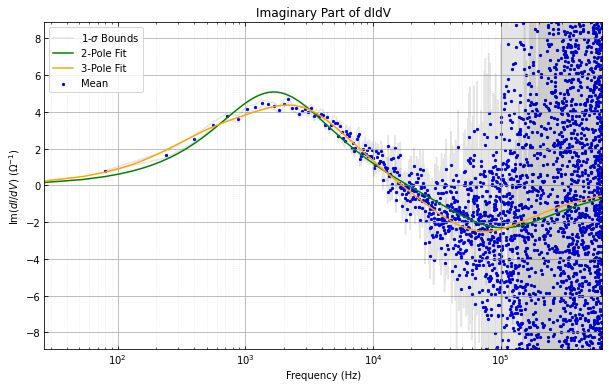



Melange4pc1ch TES bias 35.037 uA, R0 = 114.61 mOhms (% Rn = 33.60)

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 7.13e-05 s
Tau2: 2.62e-06 s
Tau3: 0.0002058 s
 

True dIdV Poles: 
Tau_plus: 2.85e-06 s
Tau_minus: 5.73e-05 s
Tau_third: 0.000268 s

Small Signal Parameters:
l (loop gain) = 4.742 +/- 0.2241
beta = 0.400 +/- 0.0298
gratio = 0.718 +/- 0.0307
tau0 = 0.267 +/- 0.01488 ms
L = 441.500 +/- 9.5566 nH


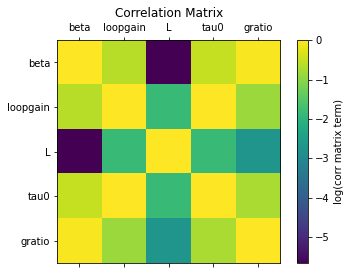

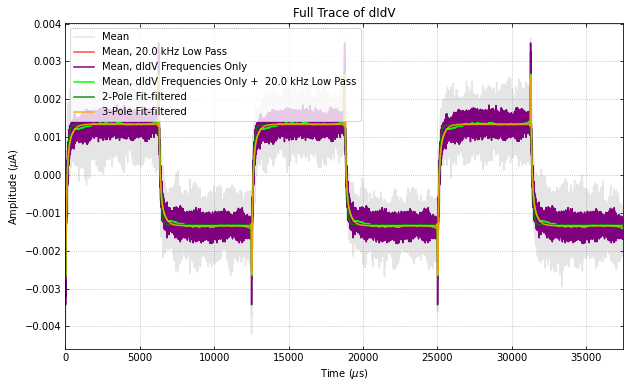

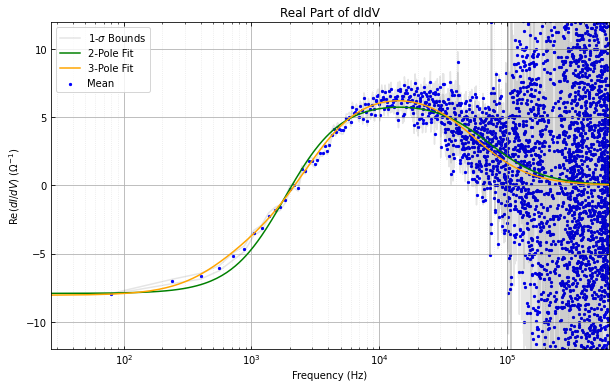

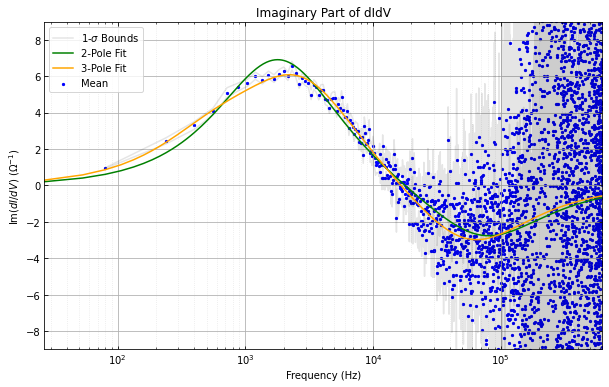



Melange4pc1ch TES bias 29.991 uA, R0 = 81.19 mOhms (% Rn = 23.80)

Fit chi2/Ndof = 0.172

Fit time constants, NOT dIdV Poles: 
Tau1: 6.36e-05 s
Tau2: 3.48e-06 s
Tau3: 0.0001963 s
 

True dIdV Poles: 
Tau_plus: 3.91e-06 s
Tau_minus: 6.1e-05 s
Tau_third: 0.0002545 s

Small Signal Parameters:
l (loop gain) = 6.038 +/- 0.3353
beta = 0.533 +/- 0.0329
gratio = 0.736 +/- 0.0376
tau0 = 0.32 +/- 0.02039 ms
L = 460.948 +/- 7.4360 nH


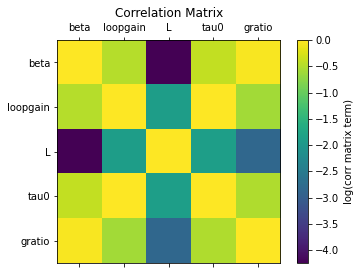

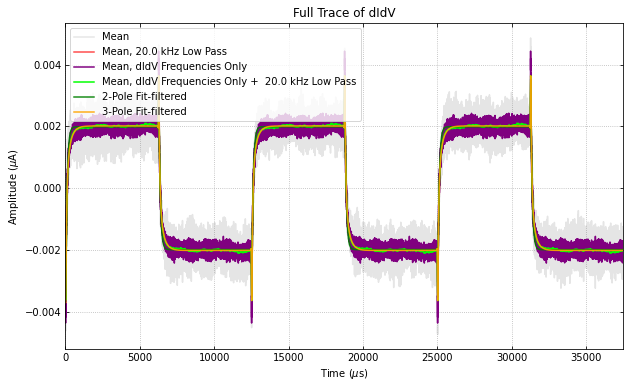

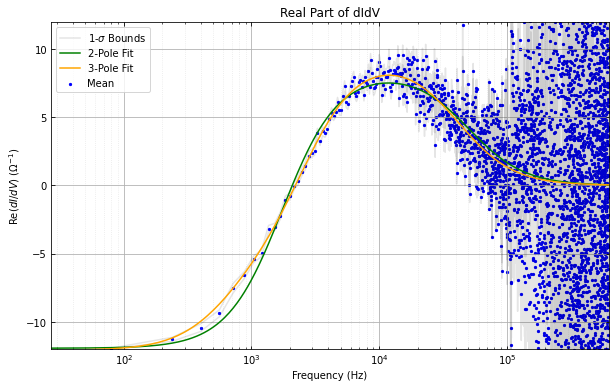

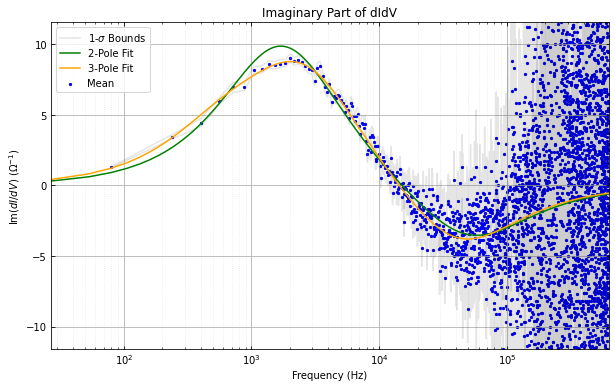



Melange4pc1ch TES bias 28.037 uA, R0 = 69.33 mOhms (% Rn = 20.30)

Fit chi2/Ndof = 0.167

Fit time constants, NOT dIdV Poles: 
Tau1: 6.14e-05 s
Tau2: 4.01e-06 s
Tau3: 0.0001954 s
 

True dIdV Poles: 
Tau_plus: 4.58e-06 s
Tau_minus: 6.29e-05 s
Tau_third: 0.0002507 s

Small Signal Parameters:
l (loop gain) = 6.737 +/- 0.4061
beta = 0.565 +/- 0.0337
gratio = 0.732 +/- 0.0413
tau0 = 0.352 +/- 0.0241 ms
L = 466.546 +/- 6.6407 nH


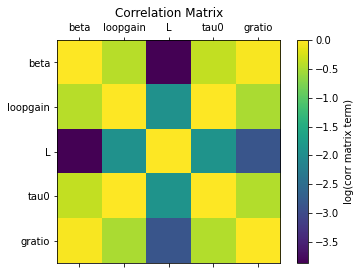

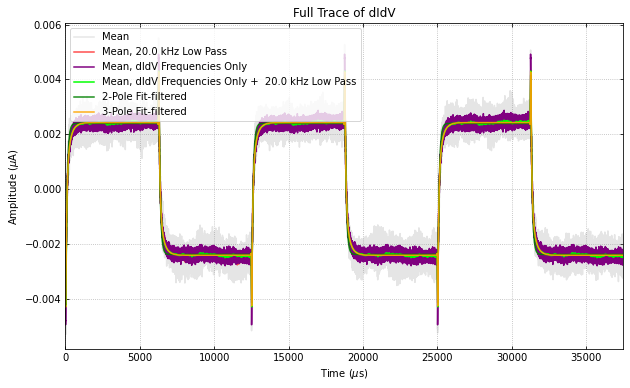

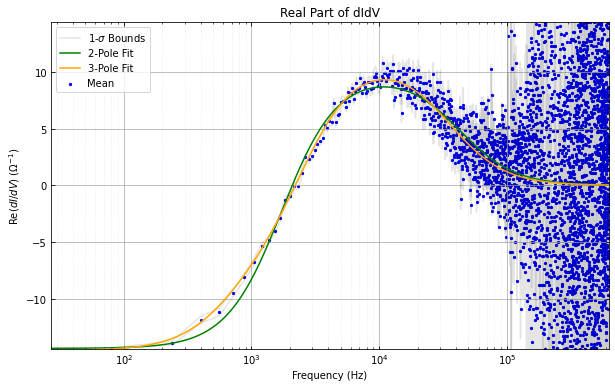

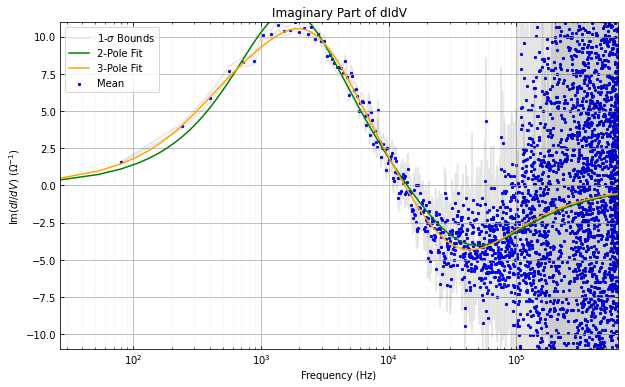



Melange4pc1ch TES bias 26.002 uA, R0 = 57.70 mOhms (% Rn = 16.90)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 5.72e-05 s
Tau2: 4.36e-06 s
Tau3: 0.0002237 s
 

True dIdV Poles: 
Tau_plus: 5.05e-06 s
Tau_minus: 6.79e-05 s
Tau_third: 0.0002802 s

Small Signal Parameters:
l (loop gain) = 8.140 +/- 0.5598
beta = 0.678 +/- 0.0367
gratio = 0.727 +/- 0.0476
tau0 = 0.408 +/- 0.03127 ms
L = 456.524 +/- 6.5734 nH


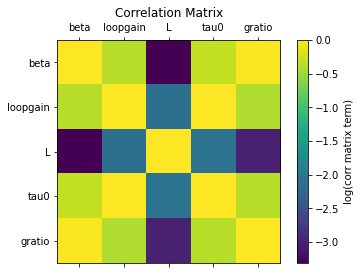

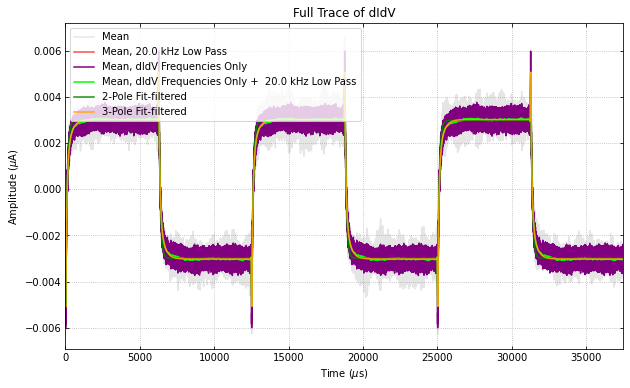

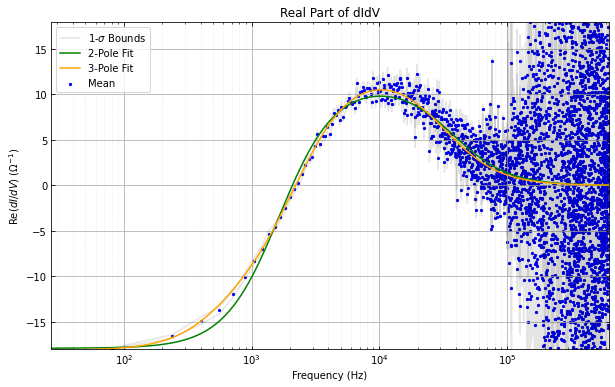

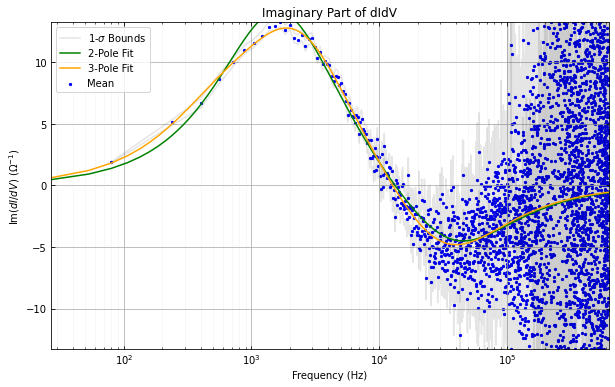



Melange4pc1ch TES bias 23.967 uA, R0 = 46.76 mOhms (% Rn = 13.70)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 5.39e-05 s
Tau2: 5.2e-06 s
Tau3: 0.0002016 s
 

True dIdV Poles: 
Tau_plus: 6.27e-06 s
Tau_minus: 6.47e-05 s
Tau_third: 0.0002642 s

Small Signal Parameters:
l (loop gain) = 7.815 +/- 0.4876
beta = 0.774 +/- 0.0390
gratio = 0.754 +/- 0.0459
tau0 = 0.367 +/- 0.02574 ms
L = 472.586 +/- 5.5944 nH


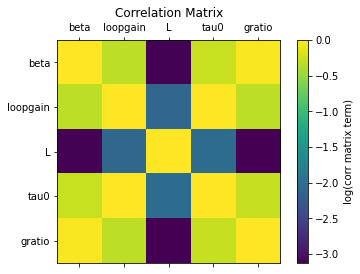

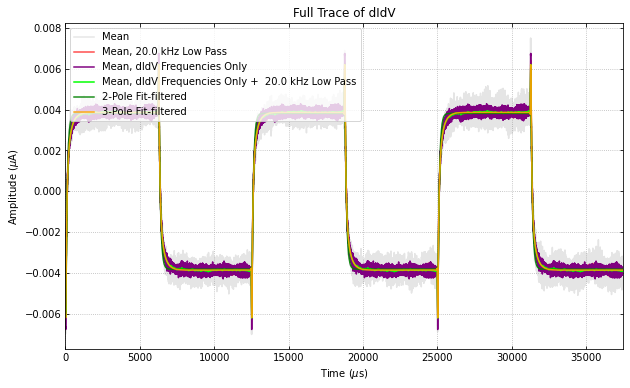

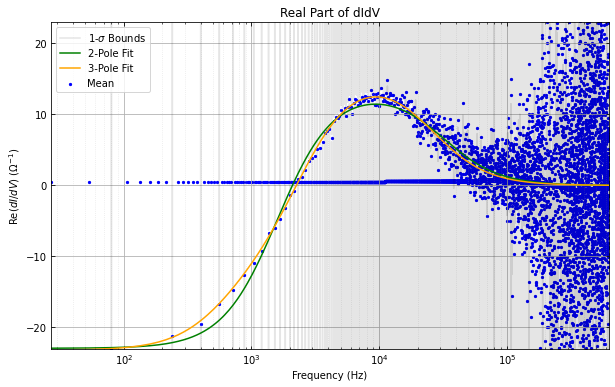

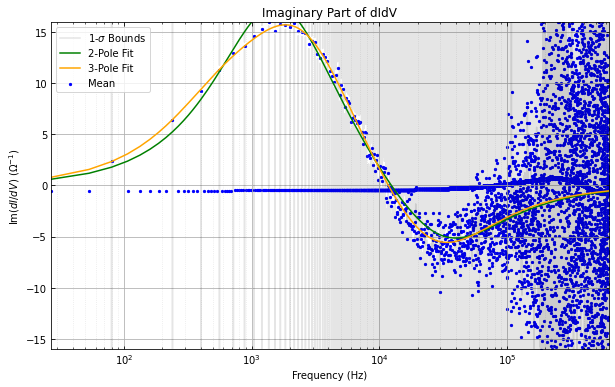



Melange4pc1ch TES bias 22.014 uA, R0 = 36.91 mOhms (% Rn = 10.80)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 4.95e-05 s
Tau2: 5.99e-06 s
Tau3: 0.000231 s
 

True dIdV Poles: 
Tau_plus: 7.5e-06 s
Tau_minus: 7.05e-05 s
Tau_third: 0.0002965 s

Small Signal Parameters:
l (loop gain) = 9.629 +/- 0.6711
beta = 0.944 +/- 0.0433
gratio = 0.738 +/- 0.0527
tau0 = 0.427 +/- 0.03287 ms
L = 477.432 +/- 4.7456 nH


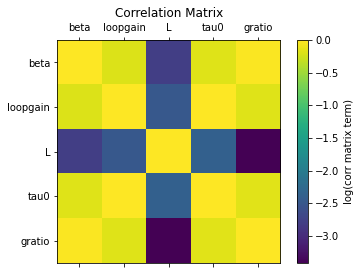

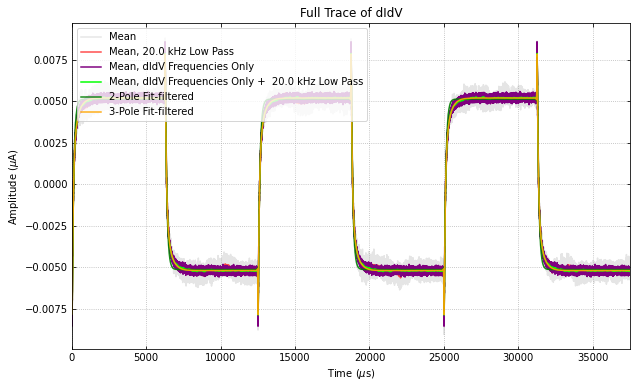

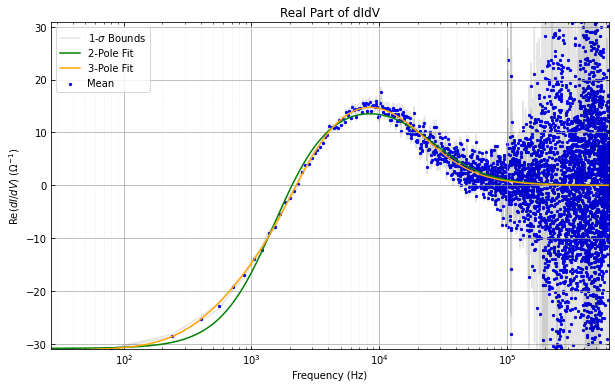

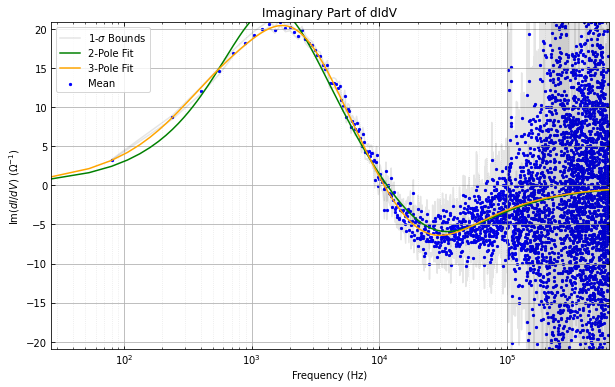



Melange4pc1ch TES bias 19.979 uA, R0 = 27.19 mOhms (% Rn = 8.00)

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 4.25e-05 s
Tau2: 7.09e-06 s
Tau3: 0.0002016 s
 

True dIdV Poles: 
Tau_plus: -1.19e-06 s
Tau_minus: 8.44e-05 s
Tau_third: 0.0002706 s

Small Signal Parameters:
l (loop gain) = 10.871 +/- 0.8040
beta = 1.248 +/- 0.0518
gratio = 0.767 +/- 0.0574
tau0 = 0.42 +/- 0.03387 ms
L = 489.437 +/- 4.7853 nH


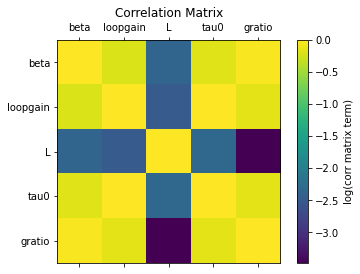

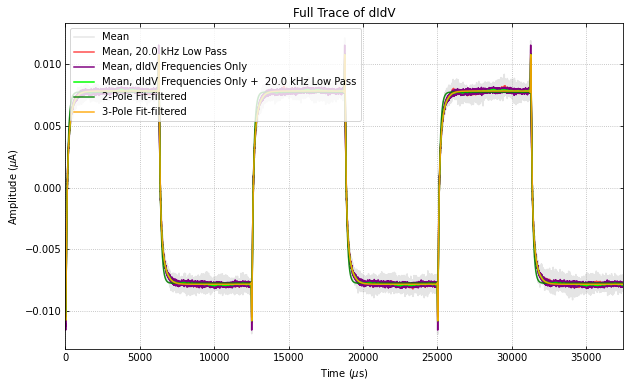

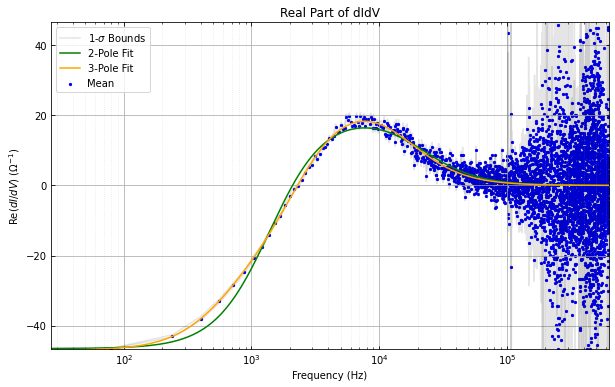

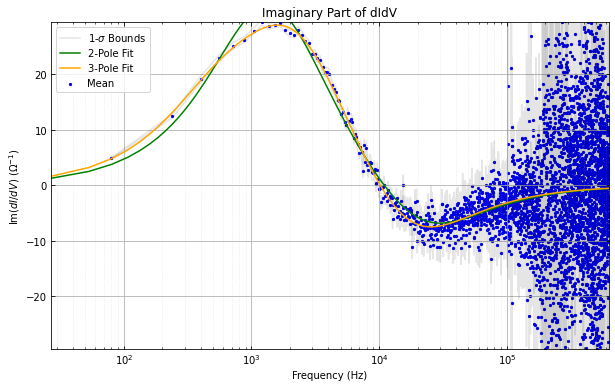

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5


In [12]:
ivanalysis.analyze_didv(lgc_plot=True)

#### Melange 1% dIdV analysis summary

Summary dIdV Analysis for Melange1pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Rp rom IV Sweep = 326.21 +/- 6.703 mOhms

TES Normal Measurements:

Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Rn rom IV Sweep = 326.21 +/- 6.703 mOhms

TES in Transition Measurements:


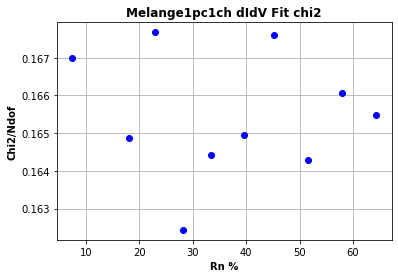


Small Signal Parameters


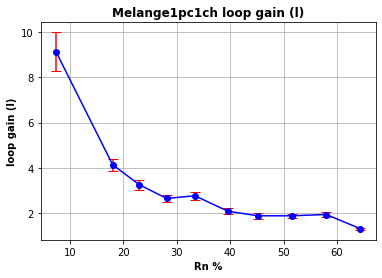

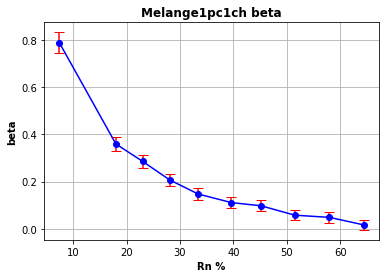

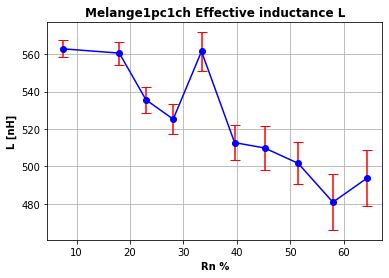

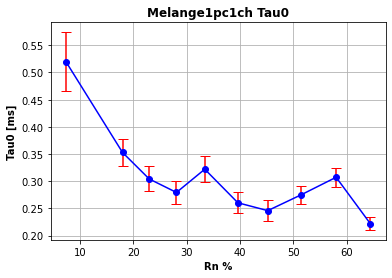

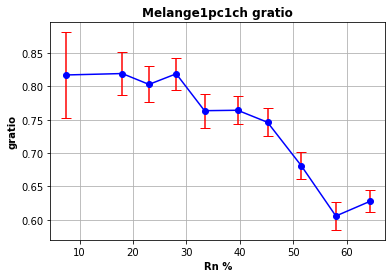


Fall Times


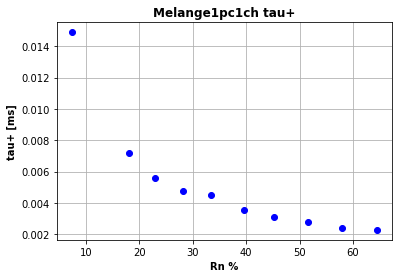

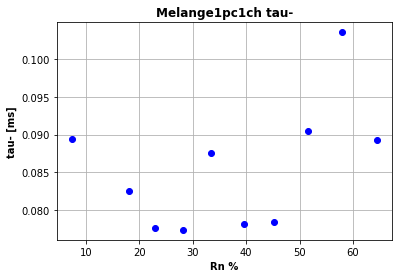

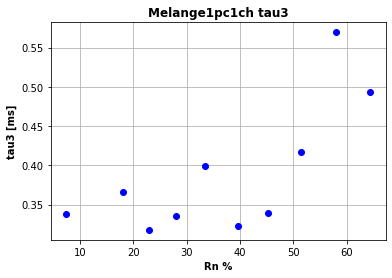

In [13]:
ivanalysis.plot_didv_summary('Melange1pc1ch')

#### Melange 4% dIdV analysis summary

Summary dIdV Analysis for Melange4pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 2.88 +/- 0.007 mOhms
Rp rom IV Sweep = 340.86 +/- 6.975 mOhms

TES Normal Measurements:

Rn from dIdV fit = 340.25 +/- 1.400 mOhms
Rn rom IV Sweep = 340.86 +/- 6.975 mOhms

TES in Transition Measurements:


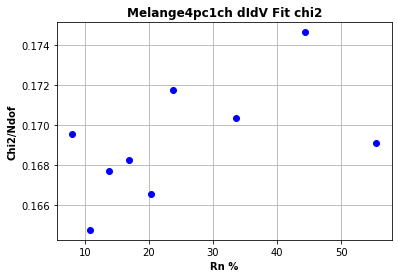


Small Signal Parameters


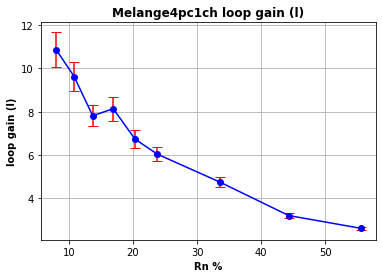

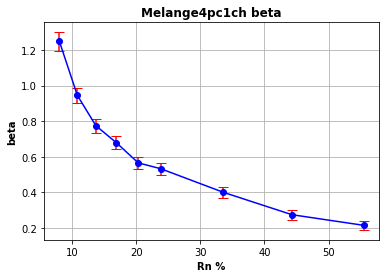

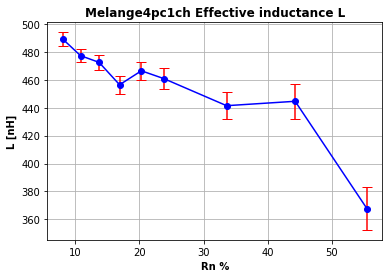

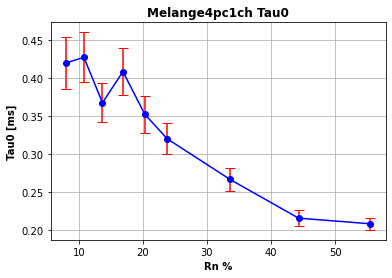

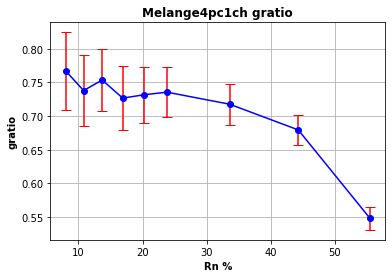


Fall Times


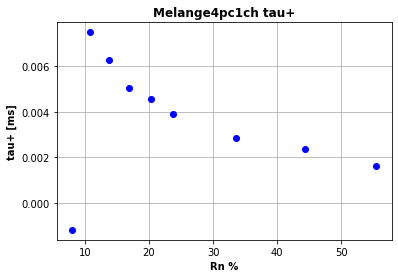

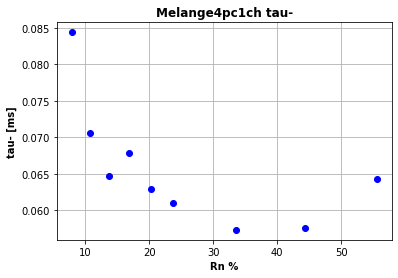

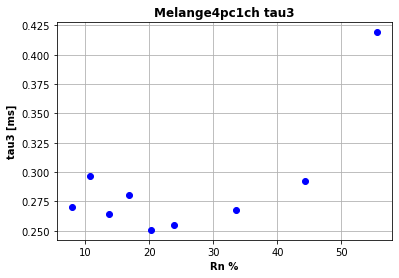

In [14]:
ivanalysis.plot_didv_summary('Melange4pc1ch')

### Melange 1%  Energy Resolution

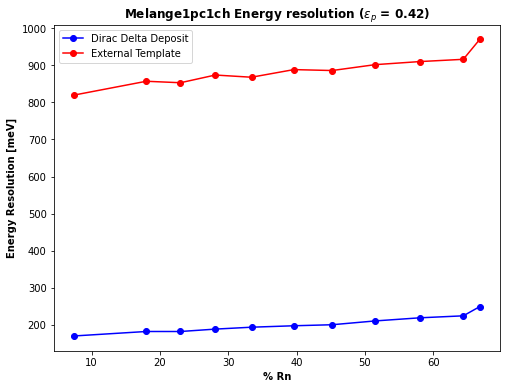

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5


In [15]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange1pc1ch')

# functional form parameters for template (power template)
amplitudes = [1.67e-15, 1.32e-15, 2.39e-17]
fall_times = [44.6e-6, 147.5e-6, 3872.9e-6]
rise_times = [8.79e-6, 8.79e-6, 8.79e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)

ivanalysis.calc_energy_resolution(channels='Melange1pc1ch', lgc_plot=True, template=template,
                                  collection_eff=0.42, lgc_power_template=True)

### Melange 4%  Energy Resolution

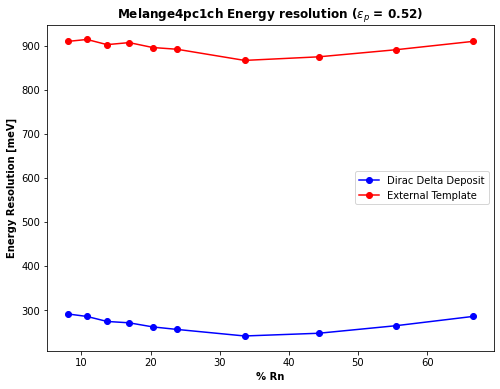

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5
Storing /Melange4pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T135424.hdf5


In [16]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange4pc1ch')

# functional form parameters for template  (power template)
amplitudes = [2.8e-15, 2.54e-15, 1.43e-16]
fall_times = [10.0e-6, 99.4e-6, 930.6e-6]
rise_times = [7.00e-6, 7.00e-6, 7.00e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)


ivanalysis.calc_energy_resolution(channels='Melange4pc1ch', lgc_plot=True, template=template,
                                  collection_eff=0.52, lgc_power_template=True)